### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

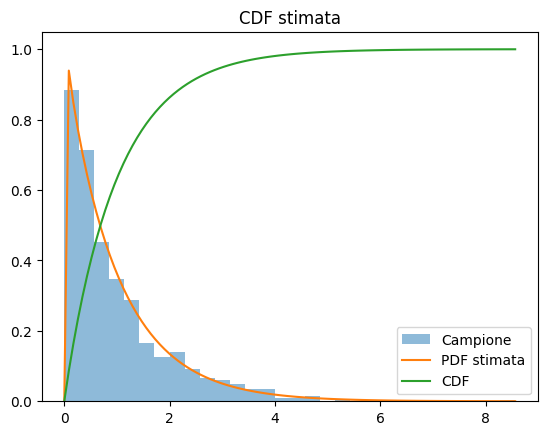

Varianza campionaria: 1.0590341339276639


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

campione = gamma.rvs(a=1, size=1000, random_state=0)

shape_fit, loc_fit, scale_fit = gamma.fit(campione)

plt.hist(campione, bins=30, density=True, alpha=0.5, label='Campione')

x = np.linspace(0, max(campione), 100)

# PDF stimata con i parametri stimati
pdf_fit = gamma.pdf(x, a=shape_fit, loc=loc_fit, scale=scale_fit)
plt.plot(x, pdf_fit, label='PDF stimata')
plt.plot(x, gamma.cdf(x, a=shape_fit, loc=loc_fit, scale=scale_fit), label='CDF')
plt.legend()
plt.title("CDF stimata")
plt.show()

print("Varianza campionaria:", np.var(campione))


### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

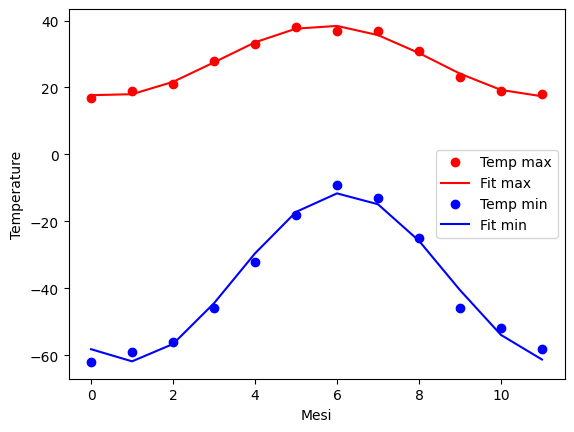

MAE max temp: 0.7720553142186452
RMSE max temp: 0.8479022664867103
MAE min temp: 2.341009357318942
RMSE min temp: 2.697276717045569


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
mesi = np.arange(12)

def sinusoid(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

params_max, _ = scipy.optimize.curve_fit(sinusoid, mesi, temp_max, p0=[20, 2*np.pi/12, 0, 20])
params_min, _ = scipy.optimize.curve_fit(sinusoid, mesi, temp_min, p0=[20, 2*np.pi/12, 0, -30])

pred_max = sinusoid(mesi, *params_max)
pred_min = sinusoid(mesi, *params_min)


plt.plot(mesi, temp_max, "ro", label="Temp max")
plt.plot(mesi, pred_max, "r-", label="Fit max")
plt.plot(mesi, temp_min, "bo", label="Temp min")
plt.plot(mesi, pred_min, "b-", label="Fit min")
plt.xlabel("Mesi")
plt.ylabel("Temperature")
plt.legend()
plt.show()

# Funzioni per MAE e RMSE
def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

print("MAE max temp:", MAE(temp_max, pred_max))
print("RMSE max temp:", RMSE(temp_max, pred_max))
print("MAE min temp:", MAE(temp_min, pred_min))
print("RMSE min temp:", RMSE(temp_min, pred_min))


### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

Modello di regressione lineare: mpg = -0.042544639961585674 * disp + 29.906604103136978


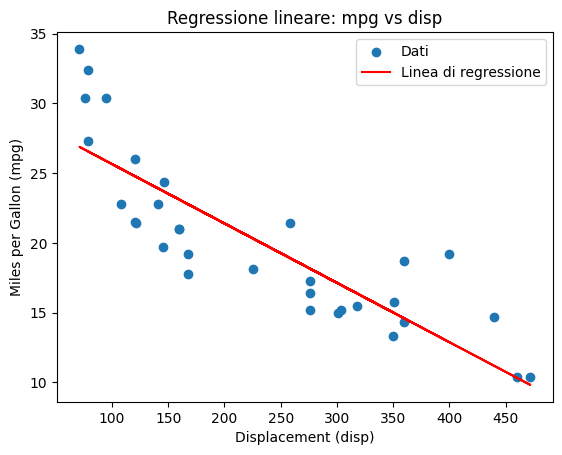

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Caricamento dataset
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

x = df['disp']
y = df['mpg']

m = np.cov(x, y,)[0,1]/np.var(x)
b = np.mean(y) - m * np.mean(x)

print(f"Modello di regressione lineare: mpg = {m} * disp + {b}")

# Valori predetti
y_pred = m * x + b

# Grafico
plt.scatter(x, y, label='Dati')
plt.plot(x, y_pred, color='red', label='Linea di regressione')
plt.xlabel('Displacement (disp)')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Regressione lineare: mpg vs disp')
plt.legend()
plt.show()
